In [1]:
import matplotlib.pyplot as plt
import pandas
import numpy as np
import mplhep
mplhep.style.use("CMS")

In [2]:
df = pandas.read_csv("results/release_timing.csv")
df["release_date"] = pandas.to_datetime(df["release_date"])

In [3]:
from matplotlib.dates import DateFormatter
dfmt = DateFormatter("%Y-%m-%d")

In [4]:
df["release_major"] = ["_".join(l.split("_")[:2]) for l in df["label"]]

In [5]:
df[["release_major", "label", "release_date", "workflow"]]

,release_major,label,release_date,workflow
0,11_0,11_0_0_pre1,2019-06-07 17:28:38,29234p21
1,11_0,11_0_0,2019-12-20 14:19:35,20634p21
2,11_1,11_1_0,2020-07-04 08:20:42,20634p21
3,11_2,11_2_0_pre2,2020-07-09 15:23:59,23434p21
4,11_2,11_2_0_pre3,2020-07-28 22:17:00,23434p21
5,11_2,11_2_0_pre4,2020-08-21 20:54:52,23434p21
6,11_2,11_2_0_pre5,2020-08-24 22:26:27,23434p21
7,11_2,11_2_0_pre6,2020-09-10 08:48:45,23434p21
8,11_2,11_2_0_pre7,2020-10-01 02:14:22,23434p21
9,11_2,11_2_0_pre8,2020-10-22 20:15:24,23434p21


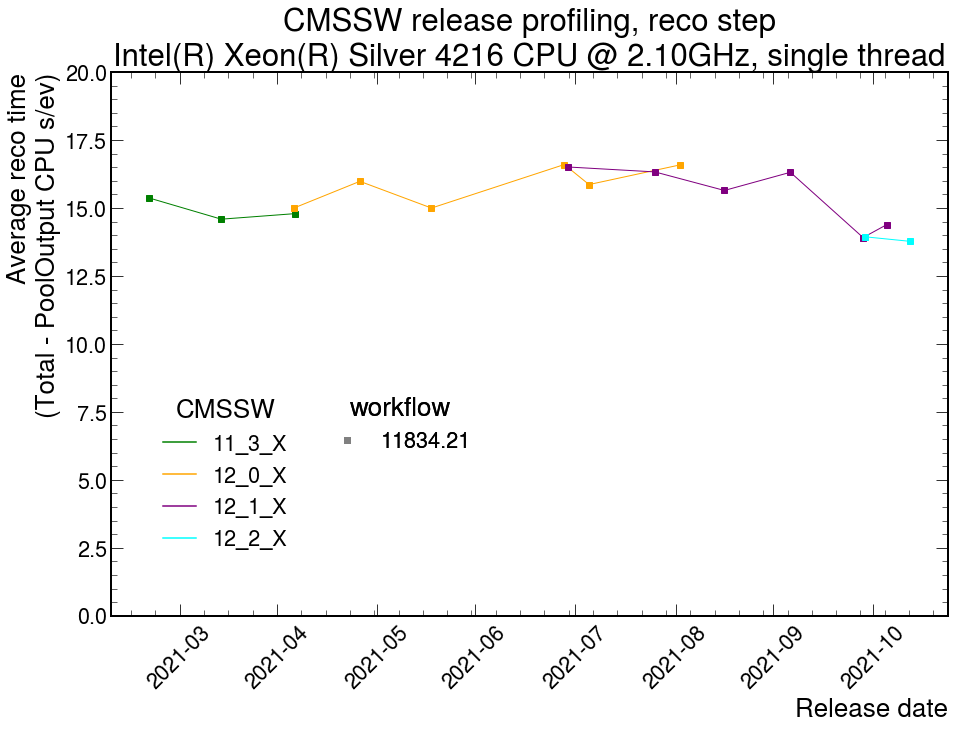

In [19]:
wf_marker = [
    ("11834p21", "s"),
]

release_color = [
    ("11_3", "green"),
    ("12_0", "orange"),
    ("12_1", "purple"),
    ("12_2", "cyan")
]

plt.figure(figsize=(15,10))
ax = plt.axes()
for release, color in release_color:
    for wf, marker in wf_marker:
        sel = df[(df["release_major"]==release) & (df["workflow"]==wf)]
        if len(sel)>0:
            ax.plot(sel["release_date"], sel["reco_time"], marker=marker, lw=1, color=color)

            from matplotlib.lines import Line2D

#handles, labels = plt.gca().get_legend_handles_labels()
handles0 = []
for release, color in release_color:
    line = Line2D([0], [0], label=release+"_X", color=color)
    handles0.extend([line])

handles1 = []
for wf, marker in wf_marker:
    line = Line2D([0], [0], label=wf.replace("p", "."), color="gray", marker=marker, lw=0)
    handles1.extend([line])
    
plt.gca().add_artist(plt.legend(handles=handles0, loc=(0.05, 0.10), title="CMSSW"))
plt.gca().add_artist(plt.legend(handles=handles1, loc=(0.25, 0.28), title="workflow"))
plt.ylabel("Average reco time\n(Total - PoolOutput CPU s/ev)")
plt.xlabel("Release date")
plt.title("CMSSW release profiling, reco step\nIntel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz, single thread")
plt.xticks(rotation=45);
plt.ylim(0,20)
plt.savefig("results/release_timing_run3.pdf", bbox_inches="tight")
plt.savefig("results/release_timing_run3.png", bbox_inches="tight", dpi=400)

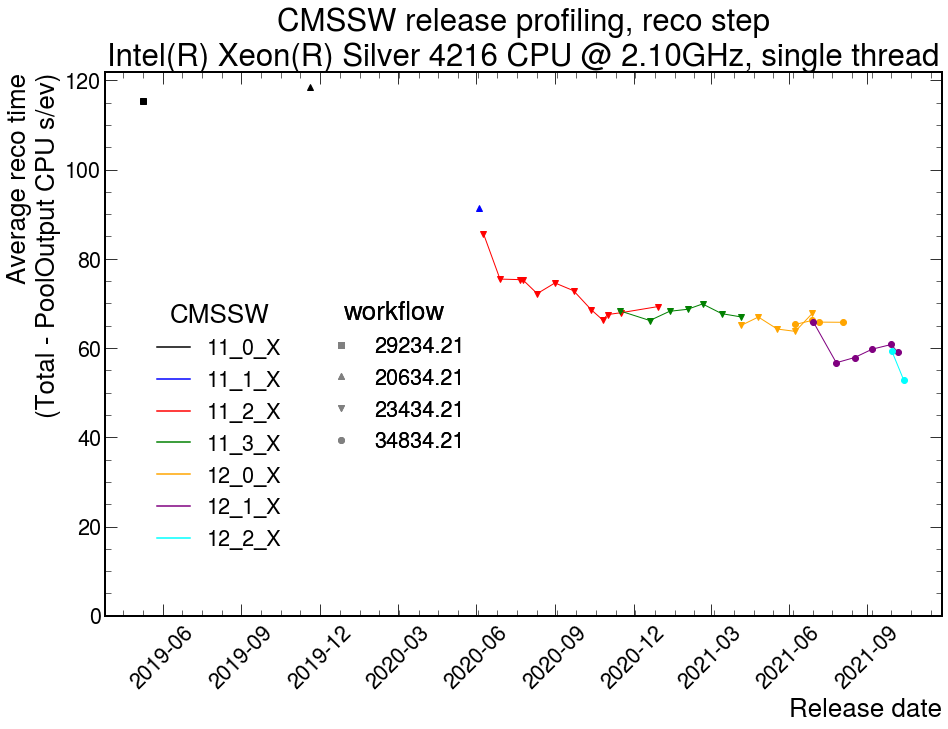

In [16]:
wf_marker = [
    ("29234p21", "s"),
    ("20634p21", "^"),
    ("23434p21", "v"),
    ("34834p21", "o")
]

release_color = [
    ("11_0", "black"),
    ("11_1", "blue"),
    ("11_2", "red"),
    ("11_3", "green"),
    ("12_0", "orange"),
    ("12_1", "purple"),
    ("12_2", "cyan")
]

plt.figure(figsize=(15, 10))
ax = plt.axes()
for release, color in release_color:
    for wf, marker in wf_marker:
        sel = df[(df["release_major"]==release) & (df["workflow"]==wf)]
        if len(sel)>0:
            ax.plot(sel["release_date"], sel["reco_time"], marker=marker, lw=1, color=color)

            from matplotlib.lines import Line2D

#handles, labels = plt.gca().get_legend_handles_labels()
handles0 = []
for release, color in release_color:
    line = Line2D([0], [0], label=release+"_X", color=color)
    handles0.extend([line])

handles1 = []
for wf, marker in wf_marker:
    line = Line2D([0], [0], label=wf.replace("p", "."), color="gray", marker=marker, lw=0)
    handles1.extend([line])
    
plt.gca().add_artist(plt.legend(handles=handles0, loc=(0.05, 0.10), title="CMSSW"))
plt.gca().add_artist(plt.legend(handles=handles1, loc=(0.25, 0.28), title="workflow"))
plt.ylabel("Average reco time\n(Total - PoolOutput CPU s/ev)")
plt.xlabel("Release date")
plt.title("CMSSW release profiling, reco step\nIntel(R) Xeon(R) Silver 4216 CPU @ 2.10GHz, single thread")
plt.xticks(rotation=45);
plt.ylim(bottom=0)
plt.savefig("results/release_timing.pdf", bbox_inches="tight")
plt.savefig("results/release_timing.png", bbox_inches="tight", dpi=400)

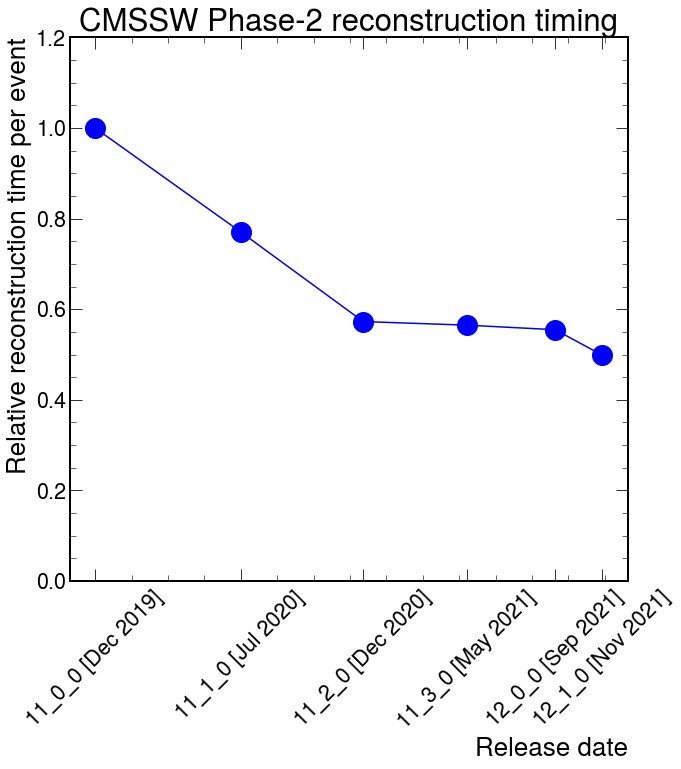

In [17]:
milestone_releases = [
    ("11_0_0", "20634p21"),
    ("11_1_0", "20634p21"),
    ("11_2_0", "23434p21"),
#    ("11_2_1", "23434p21"),
    ("11_3_0", "23434p21"),
    ("12_0_0", "34834p21"),
    ("12_1_0", "34834p21"),
]

vals_x = []
vals_y = []
for release, wf in milestone_releases:
    sel = df[(df["label"]==release) & (df["workflow"]==wf)]
    if len(sel)==1:
        vals_x.append(sel["release_date"].values[0])
        vals_y.append(sel["reco_time"].values[0])
        
        
vals_y = np.array(vals_y)
vals_y = vals_y/vals_y[0]

plt.figure(figsize=(10,10))
plt.plot(vals_x, vals_y, marker="o", ms=20, color="blue")
# for x, y, rel in zip(vals_x, vals_y, milestone_releases):
#     plt.text(x, y-0.12, rel[0], ha="center")
plt.xticks(rotation=45);
plt.ylim(0,1.2)
plt.ylabel("Relative reconstruction time per event")
plt.xlabel("Release date")
plt.ylim(bottom=0)
plt.title("CMSSW Phase-2 reconstruction timing")
plt.xticks(vals_x, [a[0]+" ["+pandas.to_datetime(b).strftime('%b %Y')+"]" for a,b in zip(milestone_releases, vals_x)]);
plt.savefig("results/major_release_timing.pdf", bbox_inches="tight")
plt.savefig("results/major_release_timing.png", bbox_inches="tight", dpi=400)